In [7]:
import numpy as np
import pandas as pd
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
from qiskit.primitives import Sampler

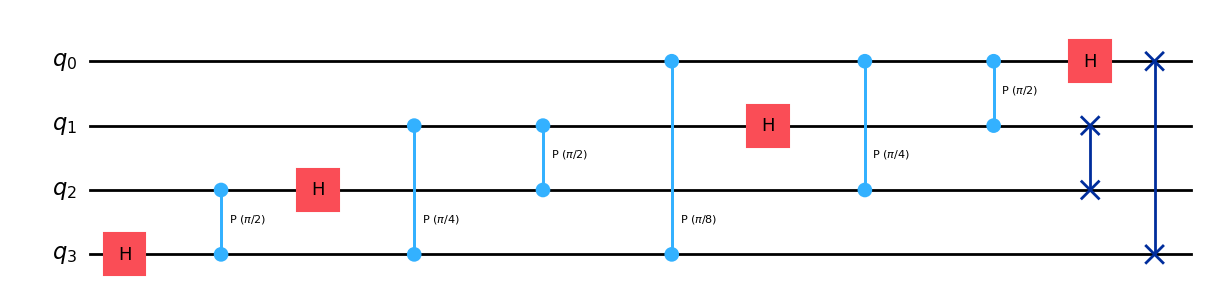

In [3]:
# visualising a QFT
display(QFT(4).decompose().draw())

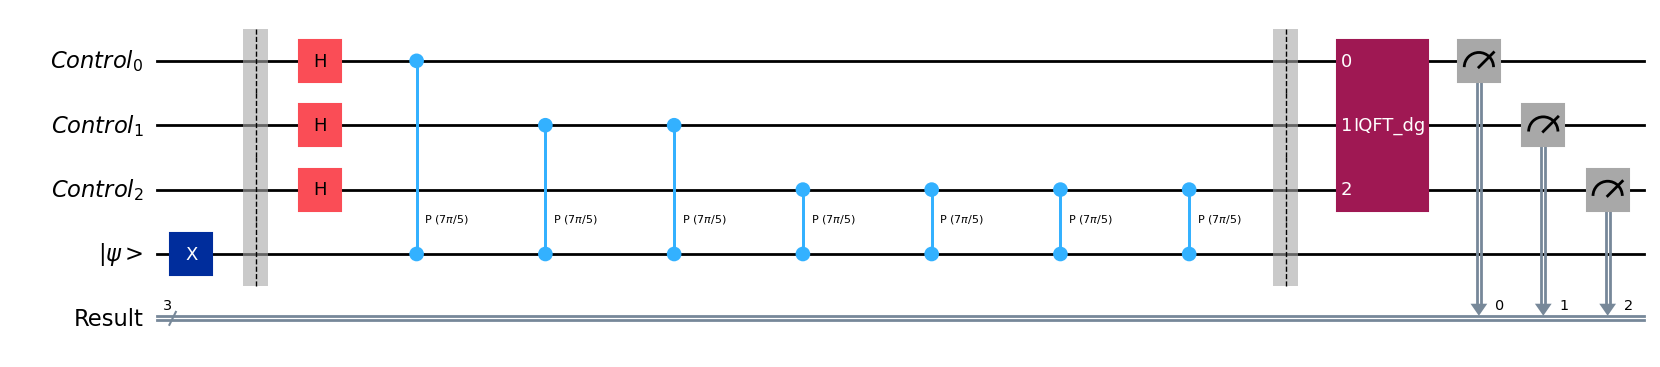

In [5]:
# implementing phase estimation algorithm with 3 control qubits
theta = 0.7
m = 3  # Number of control qubits

control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")
qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare the eigenvector |ψ>
qc.x(target_register)
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2 *np. pi * theta, qubit, target_register)
qc.barrier()

# Do inverse quantum Fourier transform
qc.compose(
    QFT(m, inverse=True),
    inplace=True
)

# Measure everything
qc.measure(range(m), range(m))
display(qc.draw())


In [8]:
result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))

Traceback (most recent call last):
  Cell In[8], line 2
    display(plot_histogram(result.quasi_dists))
NameError: name 'plot_histogram' is not defined

Use %tb to get the full traceback.
